## Data Validation and Analysis for Simulated Data

In [36]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing

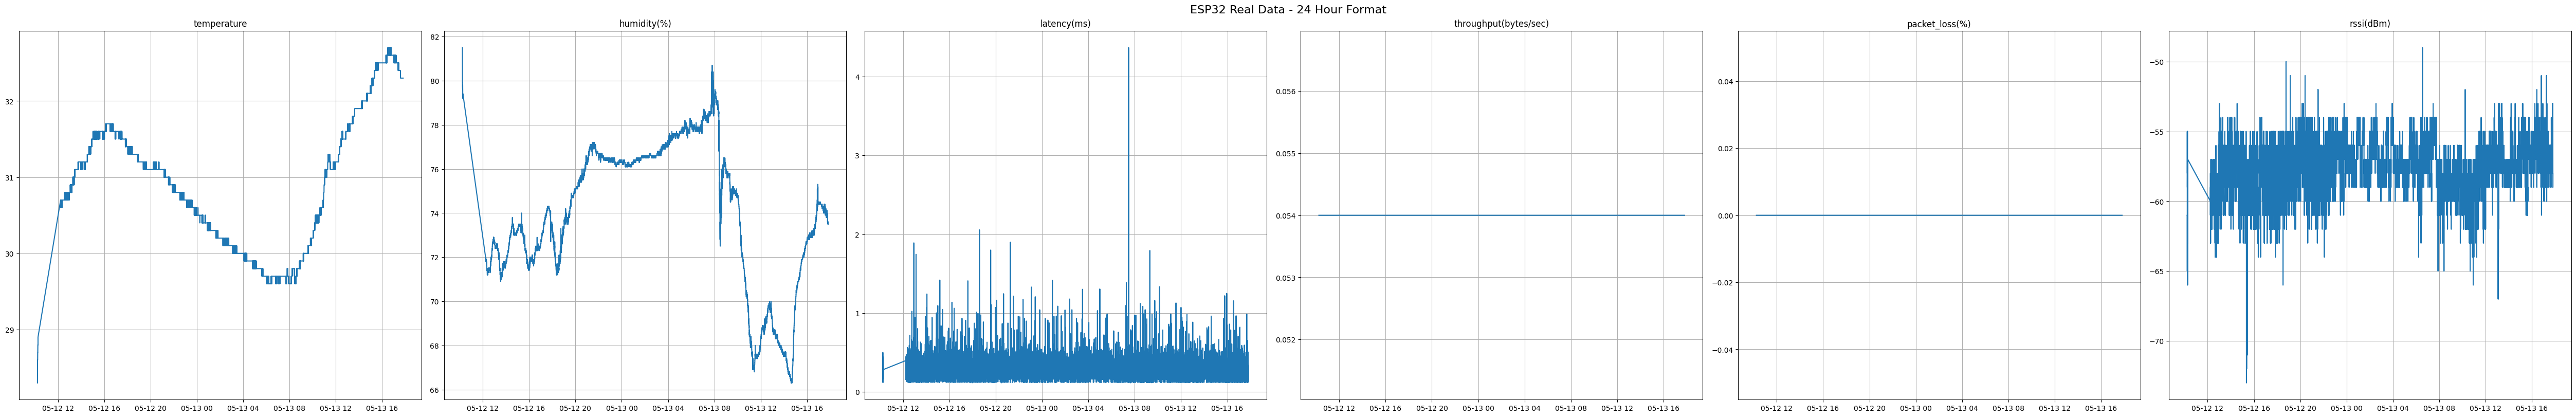

In [37]:
# Load the real data
real_data = pd.read_csv("../dataset/esp32_1_data.csv")

# Change the time column to datetime format and split it into date and time
real_data["timestamp"] = pd.to_datetime(real_data["timestamp"], format="%Y-%m-%d | %H:%M:%S")

# Set the timestamp as the index
real_data.set_index("timestamp", inplace=True)

# Define num of rows and columns for the subplots
num_cols = 6
num_rows = int(np.ceil(len(real_data.columns) / num_cols))

# Create the figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 8), constrained_layout=True)

# Flatten the axes array for iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(real_data.columns):
  axes[i].plot(real_data[column])
  axes[i].set_title(column)
  axes[i].grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

# Set the overall title for the figure
fig.suptitle("ESP32 Real Data - 24 Hour Format", fontsize=16)
plt.show()

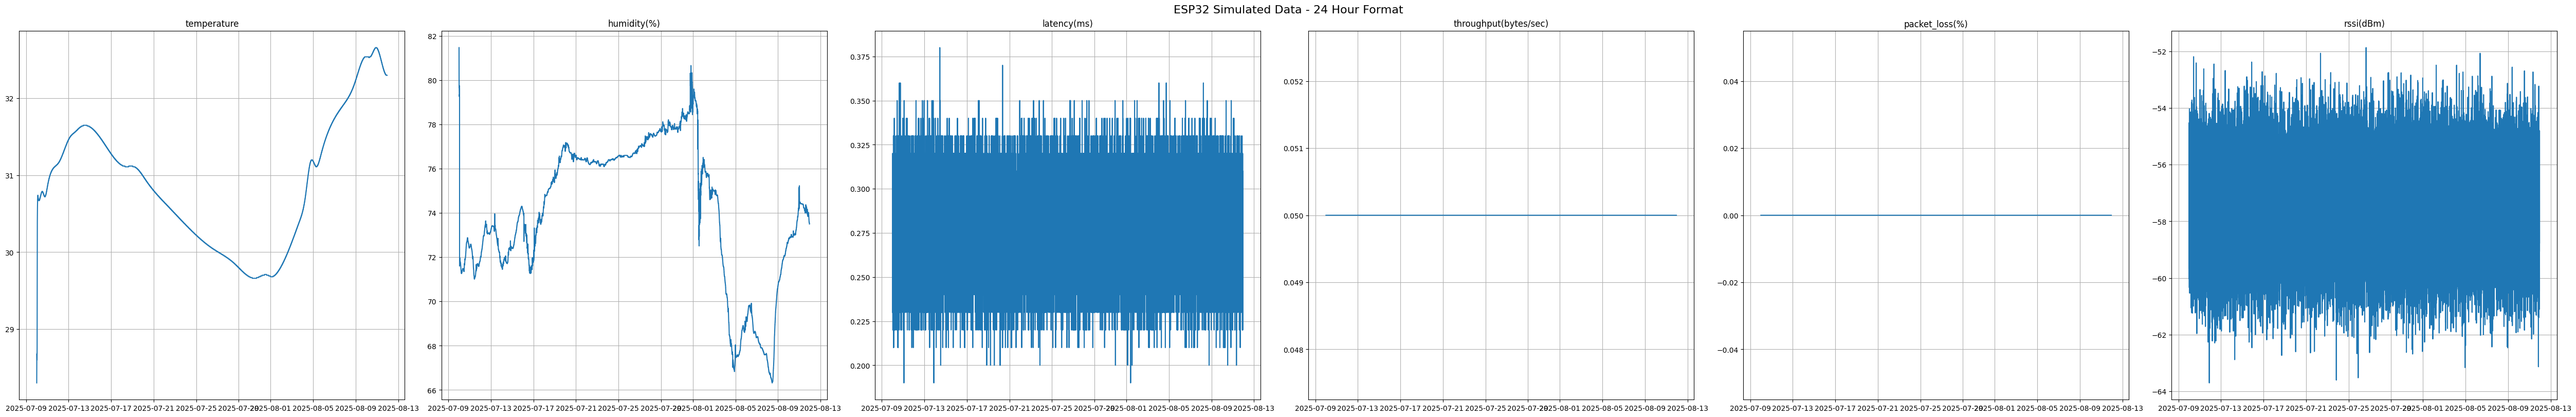

In [38]:
# Load the dataset
simulated_data = pd.read_csv("../dataset/simulation_data_20250710_190331.csv")

# Change the time column to datetime format and split it into date and time
simulated_data["timestamp"] = pd.to_datetime(simulated_data["timestamp"], format="%Y-%m-%d | %H:%M:%S")

# Set the timestamp as the index
simulated_data.set_index("timestamp", inplace=True)

# Define num of rows and columns for the subplots
num_cols = 6
num_rows = int(np.ceil(len(simulated_data.columns) / num_cols))

# Create the figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 8), constrained_layout=True)

# Flatten the axes array for iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(simulated_data.columns):
  axes[i].plot(simulated_data[column])
  axes[i].set_title(column)
  axes[i].grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

# Set the overall title for the figure
fig.suptitle("ESP32 Simulated Data - 24 Hour Format", fontsize=16)
plt.show()

## Data Validation

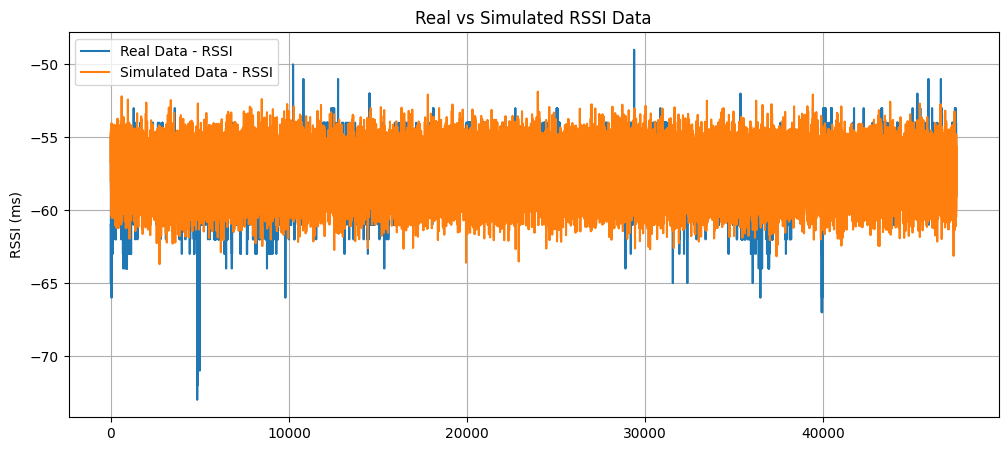

In [52]:
time = list(range(47462))

# Plot real vs simulated data
plt.figure(figsize=(12, 5))
plt.plot(time, real_data["rssi(dBm)"].values, label="Real Data - RSSI")
plt.plot(time, simulated_data["rssi(dBm)"].values, label="Simulated Data - RSSI")
plt.title("Real vs Simulated RSSI Data")
plt.ylabel("RSSI (ms)")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
from sklearn.metrics import (
  mean_absolute_percentage_error,
  mean_absolute_error,
  mean_squared_error
)

In [45]:
# Define columns list
columns_list = ["temperature", "humidity(%)", "latency(ms)", "rssi(dBm)", "throughput(bytes/sec)", "packet_loss(%)"]
error_metrics = []

# Calculate error metrics for each column
for column in columns_list:
  mse = mean_squared_error(real_data[column], simulated_data[column])
  rmse = np.sqrt(mse)
  mape = mean_absolute_percentage_error(real_data[column], simulated_data[column])
  mae = mean_absolute_error(real_data[column], simulated_data[column])
  error_metrics.append({
    "Column": column,
    "MSE": mse,
    "RMSE": rmse,
    "MAPE": mape,
    "MAE": mae,
  })

# Create a DataFrame for error metrics
error_metrics_df = pd.DataFrame(error_metrics)
error_metrics_df

,Column,MSE,RMSE,MAPE,MAE
0,temperature,0.002110,0.045939,0.001126,0.034785
1,humidity(%),0.002113,0.045966,0.000468,0.034619
2,latency(ms),0.007903,0.088899,0.235917,0.060175
3,rssi(dBm),4.943325,2.223359,0.030590,1.762834
4,throughput(bytes/sec),0.000016,0.004000,0.074074,0.004000
5,packet_loss(%),0.000000,0.000000,0.000000,0.000000
